In [157]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [158]:
# Первичный осмотр dataFream 
df = pd.read_csv('column_3C_weka.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [159]:
# Чистка df, убираем NAN, по итогу из NaN не обнаружены
print(df.isnull().values.any())
print(f'df shape with NaN: {df.shape}')
df = df.dropna()
print(f'df shape without NaN: {df.shape}')

False
df shape with NaN: (310, 7)
df shape without NaN: (310, 7)


In [160]:
# 
df['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [161]:
#
df1 = pd.merge(df[df['class'] == 'Hernia'], df[df['class'] == 'Normal'].sample(n=60), how='outer')
df = pd.merge(df1, df[df['class'] == 'Spondylolisthesis'].sample(n=60), how='outer')
print(df['class'].value_counts())

Spondylolisthesis    60
Hernia               60
Normal               60
Name: class, dtype: int64


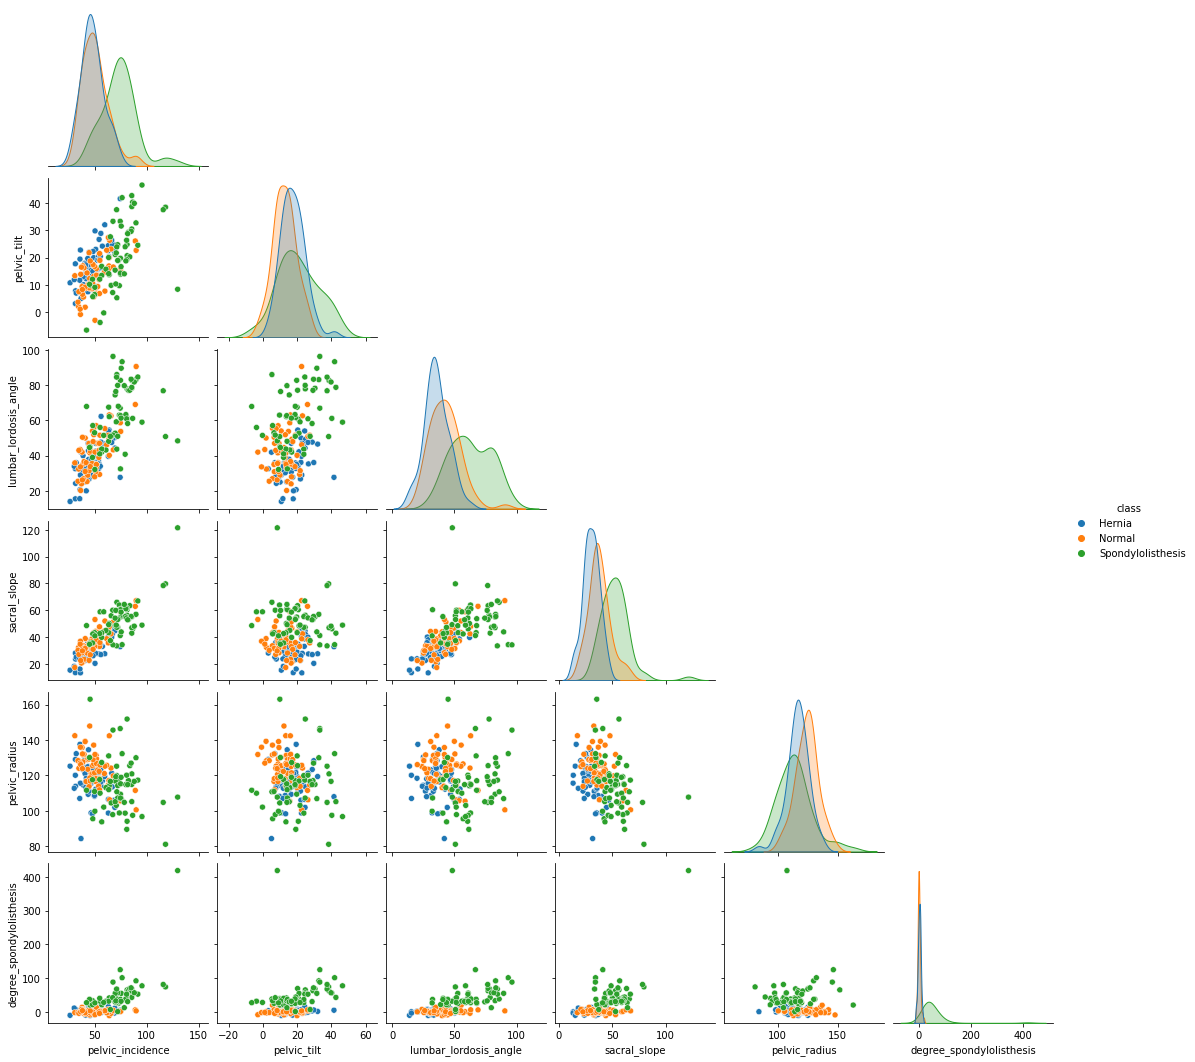

In [162]:
sns.pairplot(df, hue='class', corner = True)

In [163]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

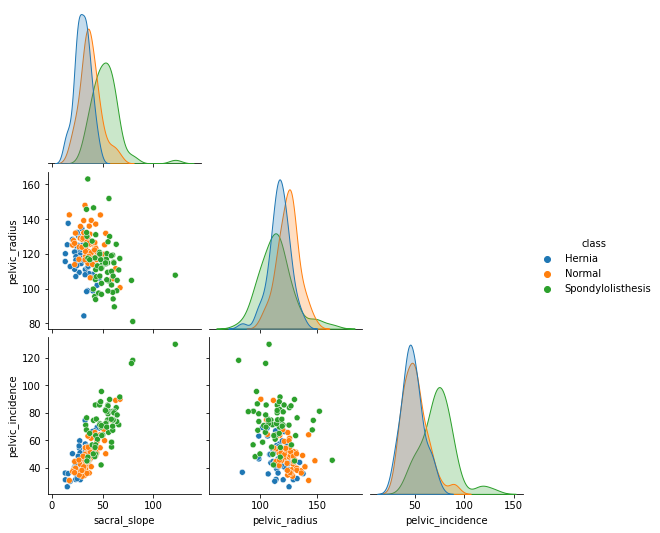

In [164]:
#здесь можно другие столбцы построить
collist = ['sacral_slope',
           'pelvic_radius',
           'pelvic_incidence',
           'class']
sns.pairplot(df[collist], hue='class', corner = True)

In [180]:
# признаки, которые берем в модель 
collist = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
X = df[collist].values
# что предсказываем
y = df['class']

In [166]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [167]:
kmeans_model = KMeans(n_clusters=3, random_state=43).fit(x)

print("Деление на 3 кластера")
score = silhouette_score(x, kmeans_model.labels_)
print("Качество кластеризации по метрике силуэтта %.3f" % score)

score = adjusted_mutual_info_score(y, kmeans_model.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % score)

Деление на 3 кластера
Качество кластеризации по метрике силуэтта 0.501
Качество кластеризации по метрике AMI 0.416


In [168]:
metrics = []
MAX_CLUSTERS = 7
X = x
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

cluster_num 1, metric 6861.6304683667695
cluster_num 2, metric 4915.124078534085
cluster_num 3, metric 4455.2361942857115
cluster_num 4, metric 3954.7644075790026
cluster_num 5, metric 3577.1614333659854
cluster_num 6, metric 3476.964420113539


best cluster num: 2


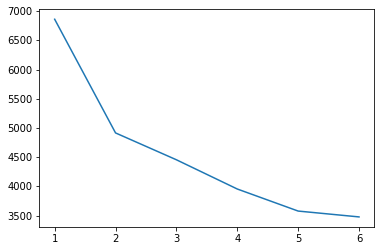

In [169]:
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [170]:
kmeans_model = KMeans(n_clusters=2, random_state=42).fit(x)

print("Деление на 2 кластера")
score = silhouette_score(x, kmeans_model.labels_)
print("Качество кластеризации по метрике силуэтта %.3f" % score)

score = adjusted_mutual_info_score(y, kmeans_model.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % score)

Деление на 2 кластера
Качество кластеризации по метрике силуэтта 0.516
Качество кластеризации по метрике AMI 0.375


In [177]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(x)

score = silhouette_score(x, cluster.labels_)
print("Качество кластеризации по метрике силуэтта %.3f" % score)

score = adjusted_mutual_info_score(y, cluster.labels_, average_method='arithmetic')
print("Качество кластеризации по метрике AMI %.3f" % score)

Качество кластеризации по метрике силуэтта 0.465
Качество кластеризации по метрике AMI 0.512


In [197]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering


algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=42))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=42,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3, linkage='ward'))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'FMI': metrics.fowlkes_mallows_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

table_metric = pd.DataFrame(data=data, columns=['ARI', 'AMI','FMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['KMeans', 'AffinityPropagation', 
                              'SpectralClustering', 'AgglomerativeClustering'])

table_metric

C:\Users\1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


,ARI,AMI,FMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.316090,0.415942,0.634038,0.330195,0.592182,0.423982,0.501332
AffinityPropagation,0.147177,0.302567,0.332700,0.534056,0.247481,0.338228,0.181141
SpectralClustering,0.265594,0.346593,0.537446,0.332101,0.378538,0.353802,0.329280
AgglomerativeClustering,0.435872,0.511530,0.691471,0.414825,0.689714,0.518063,0.465419


In [76]:
varieties = list(df.pop('class'))
samples = df[collist[:2]].values

mergings = linkage(samples, method='complete')

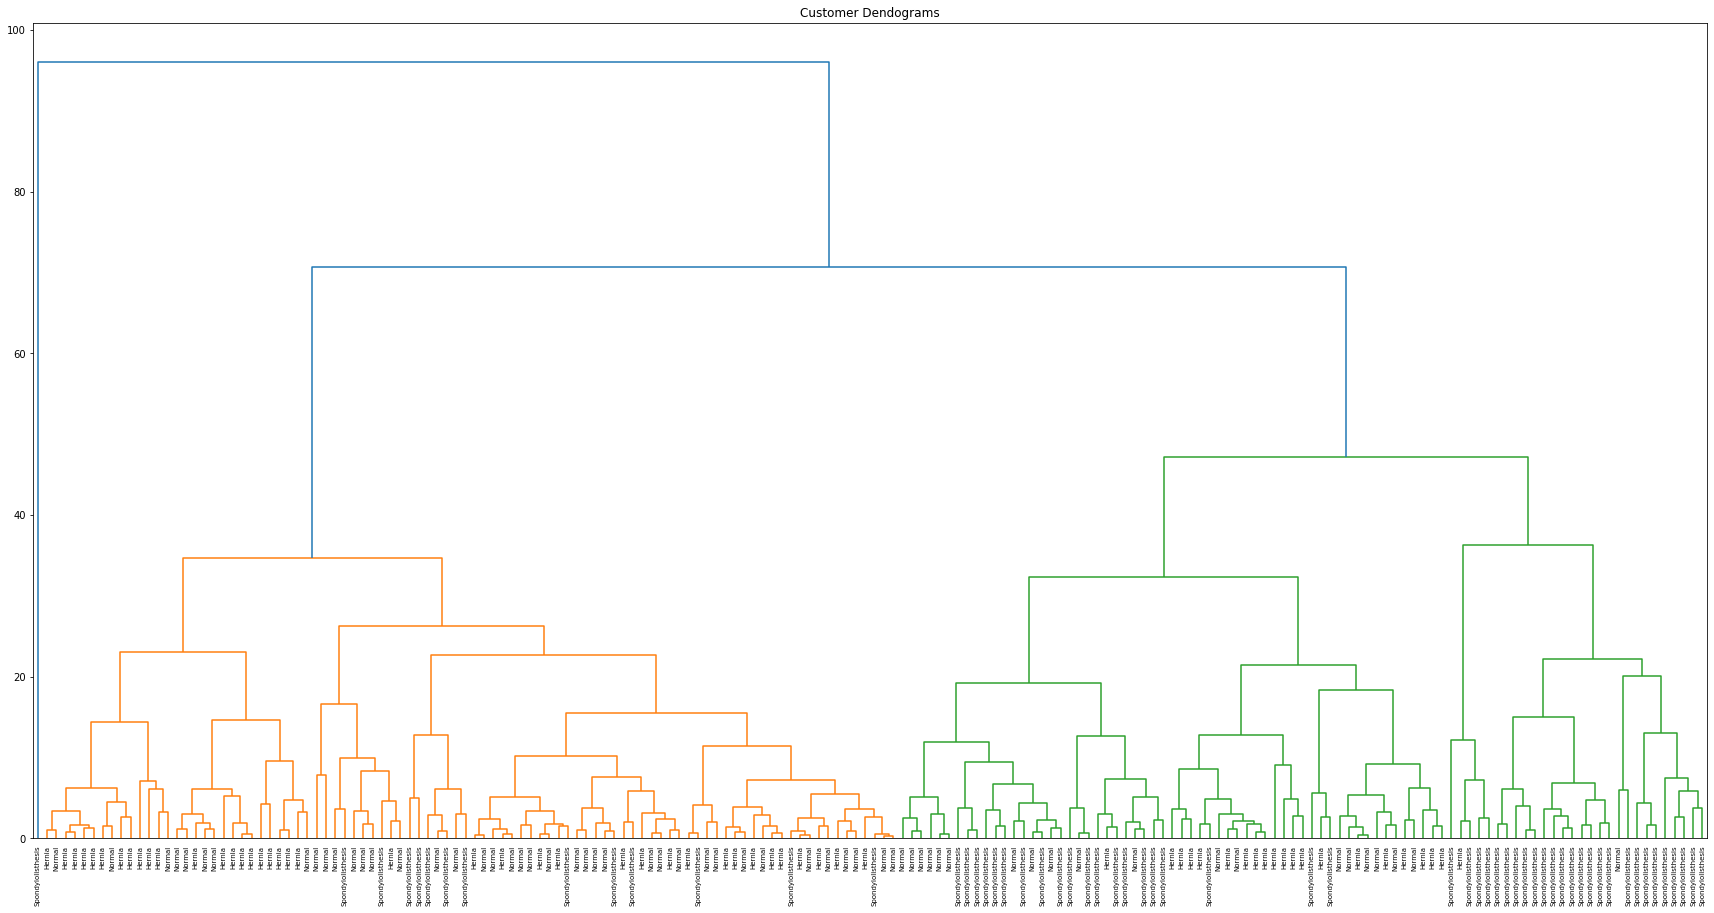

<Figure size 432x288 with 0 Axes>

In [78]:
_, ax = plt.subplots(figsize=(30, 15))
plt.title("Customer Dendograms")
dend = dendrogram(mergings,
                  labels=varieties,
                  leaf_rotation=90,
                  leaf_font_size=7,
                  ax=ax
                 )

plt.show()
plt.savefig('Dendograms.png')
